# BIKE COUNT PREDICTION

In [1]:
# importing necessary libraries for builiding the project

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings("ignore")


In [4]:
br=pd.read_csv("day.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'day.csv'

In [2]:
br=pd.read_csv("day.csv")
br=br.drop("dteday",axis=1)
br

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [4]:
outliers = (np.where((br['casual']>2000) | (br['windspeed']>25) | (br['hum']<20)))
print(outliers)


(array([ 44,  49,  68,  93,  94, 140, 147, 148, 182, 183, 184, 196, 197,
       238, 246, 280, 281, 292, 377, 382, 407, 420, 431, 432, 440, 441,
       446, 449, 454, 455, 461, 462, 468, 469, 475, 483, 489, 490, 496,
       497, 503, 504, 510, 511, 512, 517, 518, 524, 525, 531, 532, 538,
       539, 549, 559, 567, 573, 574, 580, 587, 588, 594, 608, 609, 616,
       622, 623, 629, 630, 636, 637, 643, 650, 651, 657, 658, 664, 665,
       678, 679, 692, 719, 720], dtype=int64),)


In [5]:
df1 = br.drop([ 44,  49,  68,  93,  94, 140, 147, 148, 182, 183, 184, 196, 197,
       238, 246, 280, 281, 292, 377, 382, 407, 420, 431, 432, 440, 441,
       446, 449, 454, 455, 461, 462, 468, 469, 475, 483, 489, 490, 496,
       497, 503, 504, 510, 511, 512, 517, 518, 524, 525, 531, 532, 538,
       539, 549, 559, 567, 573, 574, 580, 587, 588, 594, 608, 609, 616,
       622, 623, 629, 630, 636, 637, 643, 650, 651, 657, 658, 664, 665,
       678, 679, 692, 719, 720])
df1

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
rsq_instant = smf.ols("instant ~ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_instant = 1/(1-rsq_instant)  

rsq_season = smf.ols("season ~ instant+ yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_season = 1/(1-rsq_season)

rsq_yr = smf.ols("yr ~ instant+ season + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_yr = 1/(1-rsq_yr)

rsq_mnth = smf.ols("mnth ~ instant+ season + yr + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_mnth = 1/(1-rsq_mnth)

rsq_holiday = smf.ols("holiday ~ instant+ season + yr + mnth + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_holiday = 1/(1-rsq_holiday)

rsq_weekday = smf.ols("weekday ~ instant+ season + yr + mnth + holiday + workingday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_weekday = 1/(1-rsq_weekday)

rsq_workingday = smf.ols("workingday ~ instant+ season + yr + mnth + holiday + weekday + weathersit + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_workingday = 1/(1-rsq_workingday)

rsq_weathersit = smf.ols("weathersit ~ instant+ season + yr + mnth + holiday + weekday + workingday + temp + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_weathersit = 1/(1-rsq_weathersit)

rsq_temp = smf.ols("temp ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + atemp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_temp = 1/(1-rsq_temp)

rsq_atemp = smf.ols("atemp ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered", data=df1).fit().rsquared
vif_atemp = 1/(1-rsq_atemp)

rsq_hum = smf.ols("hum ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + windspeed + casual + registered", data=df1).fit().rsquared
vif_hum = 1/(1-rsq_hum)

rsq_windspeed  = smf.ols("windspeed  ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + casual + registered", data=df1).fit().rsquared
vif_windspeed  = 1/(1-rsq_windspeed )

rsq_casual   = smf.ols("casual   ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + registered", data=df1).fit().rsquared
vif_casual   = 1/(1-rsq_casual)

rsq_registered    = smf.ols(" registered    ~ instant+ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed + casual", data=df1).fit().rsquared
vif_registered    = 1/(1-rsq_registered)


In [7]:
VIF= {"Variables":['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered'],
      'VIF':[vif_instant, vif_season, vif_yr, vif_mnth, vif_holiday, vif_weekday, vif_workingday, vif_weathersit, vif_temp, vif_atemp, vif_hum, vif_windspeed, vif_casual, vif_registered]}
VIF_df = pd.DataFrame(VIF)
VIF_df

,Variables,VIF
0,instant,580.661576
1,season,4.095770
2,yr,437.655211
3,mnth,153.972101
4,holiday,1.150845
5,weekday,1.286637
6,workingday,1.101257
7,weathersit,2.081491
8,temp,62.822163
9,atemp,62.650121


In [8]:
VIF_df[VIF_df.VIF>10]

,Variables,VIF
0,instant,580.661576
2,yr,437.655211
3,mnth,153.972101
8,temp,62.822163
9,atemp,62.650121


<function matplotlib.pyplot.show(close=None, block=None)>

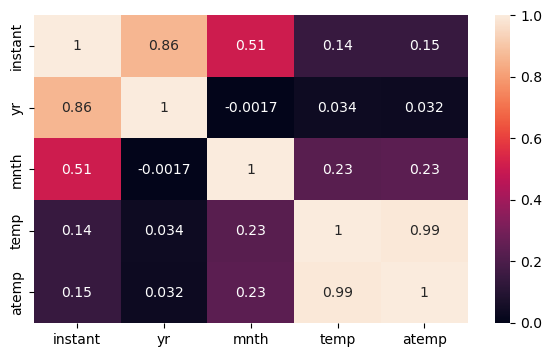

In [9]:
plt.figure(figsize=(7,4))
sns.heatmap(df1[["instant","yr","mnth","temp","atemp"]].corr(),annot=True,color="white")
plt.show

In [10]:
df1=df1.drop(columns=['yr','atemp'],axis=1)
df1

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,1,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,1,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,1,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,1,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,5,1,2,10.420847,65.2917,23.458911,247,1867,2114
726,727,1,12,0,6,0,2,10.386653,59.0000,10.416557,644,2451,3095
727,728,1,12,0,0,0,2,10.386653,75.2917,8.333661,159,1182,1341
728,729,1,12,0,1,1,1,10.489153,48.3333,23.500518,364,1432,1796


In [11]:
model1=smf.ols("cnt ~ instant+season+yr+mnth+holiday+weekday+workingday+weathersit+temp+atemp+hum+windspeed+casual+registered",data=br).fit()

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.507e+29
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        20:26:26   Log-Likelihood:                 16527.
No. Observations:                 730   AIC:                        -3.302e+04
Df Residuals:                     715   BIC:                        -3.295e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.663e-13   1.04e-11      0.093      0.926   -1.95e-11    2.15e-11
instant    -2.309e-14   1.53e-13     -0.151      0.880   -3.23e-13    2.77e-13
season      4.121e-13   2.41e-12      0.171      0.864   -4.31e-12    5.14e-12
yr          4.547e-12   5.62e-11      0.081      0.935   -1.06e-10    1.15e-10
mnth        6.253e-13    4.7e-12      0.133      0.894   -8.61e-12    9.86e-12
holiday    -8.811e-13   8.47e-12     -0.104      0.917   -1.75e-11    1.58e-11
weekday    -1.243e-14   8.01e-13     -0.016      0.988   -1.58e-12    1.56e-12
workingday -4.476e-13   3.03e-12     -0.148      0.883    -6.4e-12     5.5e-12
weathersit -3.411e-13   3.38e-12     -0.101      0.920   -6.97e-12    6.29e-12
temp        3.624e-13   1.42e-12      0.255      0.799   -2.43e-12    3.15e-12
atemp       -4.05e-13   1.32e-12     -0.307      0.759      -3e-12    2.19e-12
hum         1.776e-14   1.31e-13      0.136      0.892   -2.39e-13    2.75e-13
windspeed  -3.908e-14   2.87e-13     -0.136      0.892   -6.03e-13    5.25e-13
casual         1.0000   2.84e-15   3.52e+14      0.000       1.000       1.000
registered     1.0000    1.8e-15   5.55e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       73.274   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.134
Skew:                           0.044   Prob(JB):                     1.56e-05
Kurtosis:                       2.152   Cond. No.                     1.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model2=smf.ols("cnt ~ instant+season+mnth+holiday+weekday+workingday+weathersit+temp+hum+windspeed+casual+registered",data=df1).fit()

In [14]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.117e+29
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        20:26:26   Log-Likelihood:                 14774.
No. Observations:                 647   AIC:                        -2.952e+04
Df Residuals:                     634   BIC:                        -2.946e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.537e-12   8.62e-12     -0.758      0.449   -2.35e-11    1.04e-11
instant     2.776e-15      1e-14      0.277      0.782   -1.69e-14    2.24e-14
season     -3.126e-13   2.09e-12     -0.149      0.881   -4.42e-12     3.8e-12
mnth        7.105e-15   6.98e-13      0.010      0.992   -1.36e-12    1.38e-12
holiday    -9.095e-13   7.59e-12     -0.120      0.905   -1.58e-11     1.4e-11
weekday    -9.948e-14    6.8e-13     -0.146      0.884   -1.44e-12    1.24e-12
workingday          0   2.69e-12          0      1.000   -5.27e-12    5.27e-12
weathersit  3.695e-13   3.03e-12      0.122      0.903   -5.58e-12    6.32e-12
temp       -2.798e-14   2.52e-13     -0.111      0.912   -5.23e-13    4.67e-13
hum         1.243e-14   1.19e-13      0.104      0.917   -2.22e-13    2.47e-13
windspeed   1.386e-13   2.67e-13      0.519      0.604   -3.86e-13    6.63e-13
casual         1.0000   3.72e-15   2.69e+14      0.000       1.000       1.000
registered     1.0000   1.56e-15   6.39e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       27.842   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.232
Skew:                           0.035   Prob(JB):                      0.00221
Kurtosis:                       2.330   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df1_norm=(df1-df1.min())/(df1.max()-df1.min())
df1_norm=df1_norm.drop('cnt',axis=1)
df1_norm=pd.concat((df1_norm, df1.cnt), 1)

In [16]:
df1_norm

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0.000000,0.0,0.0,0.0,0.166667,1.0,0.5,0.355170,0.755799,0.399260,0.165660,0.091539,985
1,0.001372,0.0,0.0,0.0,0.333333,1.0,0.5,0.379232,0.594999,0.654030,0.064955,0.093849,801
2,0.002743,0.0,0.0,0.0,0.500000,1.0,0.0,0.171000,0.215785,0.653364,0.059416,0.174560,1349
3,0.004115,0.0,0.0,0.0,0.666667,1.0,0.0,0.175530,0.440198,0.398826,0.053374,0.207046,1562
4,0.005487,0.0,0.0,0.0,0.833333,1.0,0.0,0.209120,0.215322,0.475766,0.040282,0.216286,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.994513,0.0,1.0,0.0,0.833333,1.0,0.5,0.243025,0.531747,0.947845,0.123364,0.266676,2114
726,0.995885,0.0,1.0,0.0,1.000000,0.0,0.5,0.241986,0.439560,0.384872,0.323263,0.350996,3095
727,0.997257,0.0,1.0,0.0,0.000000,0.0,0.5,0.241986,0.678267,0.294964,0.079053,0.167774,1341
728,0.998628,0.0,1.0,0.0,0.166667,1.0,0.0,0.245101,0.283272,0.949641,0.182276,0.203869,1796


In [17]:
X=df1_norm.iloc[:,0:-1]
y=df1_norm.iloc[:,-1]

In [18]:
X = X.replace(np.nan, 0)

In [19]:
X

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0.000000,0.0,0.0,0.0,0.166667,1.0,0.5,0.355170,0.755799,0.399260,0.165660,0.091539
1,0.001372,0.0,0.0,0.0,0.333333,1.0,0.5,0.379232,0.594999,0.654030,0.064955,0.093849
2,0.002743,0.0,0.0,0.0,0.500000,1.0,0.0,0.171000,0.215785,0.653364,0.059416,0.174560
3,0.004115,0.0,0.0,0.0,0.666667,1.0,0.0,0.175530,0.440198,0.398826,0.053374,0.207046
4,0.005487,0.0,0.0,0.0,0.833333,1.0,0.0,0.209120,0.215322,0.475766,0.040282,0.216286
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.994513,0.0,1.0,0.0,0.833333,1.0,0.5,0.243025,0.531747,0.947845,0.123364,0.266676
726,0.995885,0.0,1.0,0.0,1.000000,0.0,0.5,0.241986,0.439560,0.384872,0.323263,0.350996
727,0.997257,0.0,1.0,0.0,0.000000,0.0,0.5,0.241986,0.678267,0.294964,0.079053,0.167774
728,0.998628,0.0,1.0,0.0,0.166667,1.0,0.0,0.245101,0.283272,0.949641,0.182276,0.203869


In [20]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 647, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.3,shuffle=True, random_state=10)

In [22]:
dtmodel=DecisionTreeRegressor(max_depth=3,splitter='best',random_state=10,max_features=None)
dtmodel.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [23]:
y_pred=dtmodel.predict(x_test)

In [24]:
mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 205001.4710312605


In [25]:
r2=r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9369293524258299


In [26]:
mae=mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 362.9106468848984


In [27]:
RMSE=np.sqrt(mse)
print("RMSE:", RMSE)

RMSE: 452.7708813862266


In [28]:
mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
print('mape:',mape)

mape: 0.11604134096475463


In [29]:
DecisionTree_Results=pd.DataFrame({'attribute':['Regressor','MSE','MAE','R2','RMSE','mape'],'value':['decision_TreeRegressor',mse,mae,r2,RMSE,mape]}) 

In [30]:
DecisionTree_Results

,attribute,value
0,Regressor,decision_TreeRegressor
1,MSE,205001.471031
2,MAE,362.910647
3,R2,0.936929
4,RMSE,452.770881
5,mape,0.116041


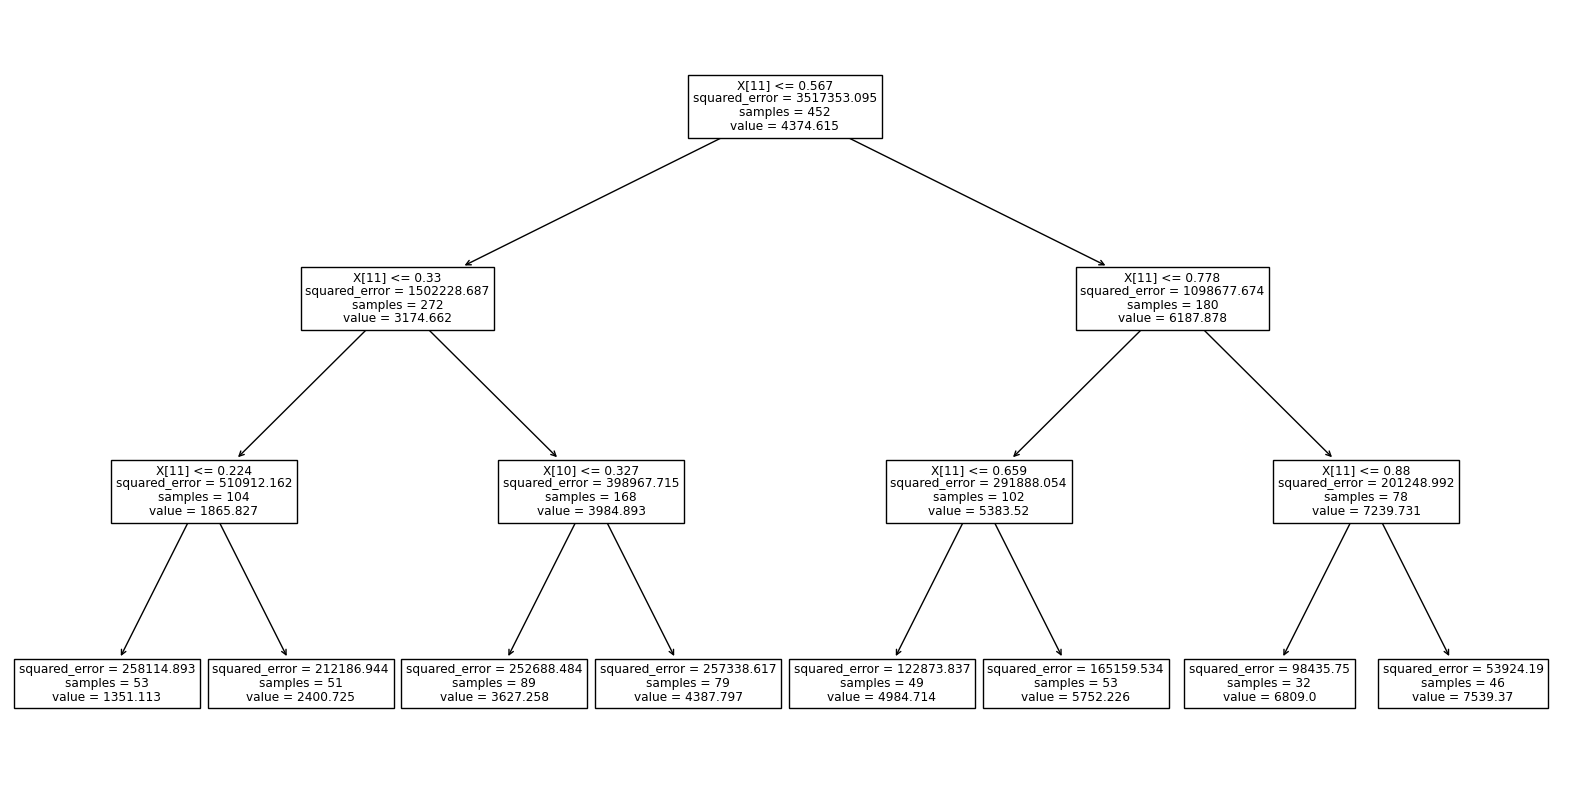

In [31]:
plt.figure(figsize=(20,10))
tree.plot_tree(dtmodel)
plt.show()

In [32]:
param_grid={'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,4,6,8,10]}

dtgrid_search=GridSearchCV(dtmodel,param_grid,cv=5)
dtgrid_search.fit(x_train,y_train)
print("best parameters:",dtgrid_search.best_params_)
print("best score:",dtgrid_search.best_score_)

best parameters: {'max_depth': 5, 'min_samples_split': 10}
best score: 0.9770609727920849


In [33]:
griddtmodel=DecisionTreeRegressor(max_depth=5,splitter='best',random_state=10,max_features=None,min_samples_split=2)
griddtmodel.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [34]:
GDY_pred=griddtmodel.predict(x_test)

In [35]:
GDmse=mean_squared_error(y_test,GDY_pred)
print("Mean Squared Error:", GDmse)
GDmae=mean_absolute_error(y_test,GDY_pred)
print("mean Absolute Error:",GDmae)
GDr2=r2_score(y_test, GDY_pred)
print("R-squared:",r2)
GDRMSE=np.sqrt(GDmse)
print("RMSE:", GDRMSE)

Mean Squared Error: 54015.03383404228
mean Absolute Error: 185.94830716111673
R-squared: 0.9369293524258299
RMSE: 232.4113461818125


In [36]:
Evaluation=pd.DataFrame(columns=['model','R_square','Mean_Squared_Error','mean_absolute_error','root_mean_squared_error','mean_absolute_percentage_error'])

In [37]:
l2=["decisionTreeregressor",GDr2,GDmse,GDmae,GDRMSE,'nan']
Evaluation.loc[len(Evaluation),:]=l2
Evaluation

,model,R_square,Mean_Squared_Error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,decisionTreeregressor,0.983382,54015.033834,185.948307,232.411346,nan


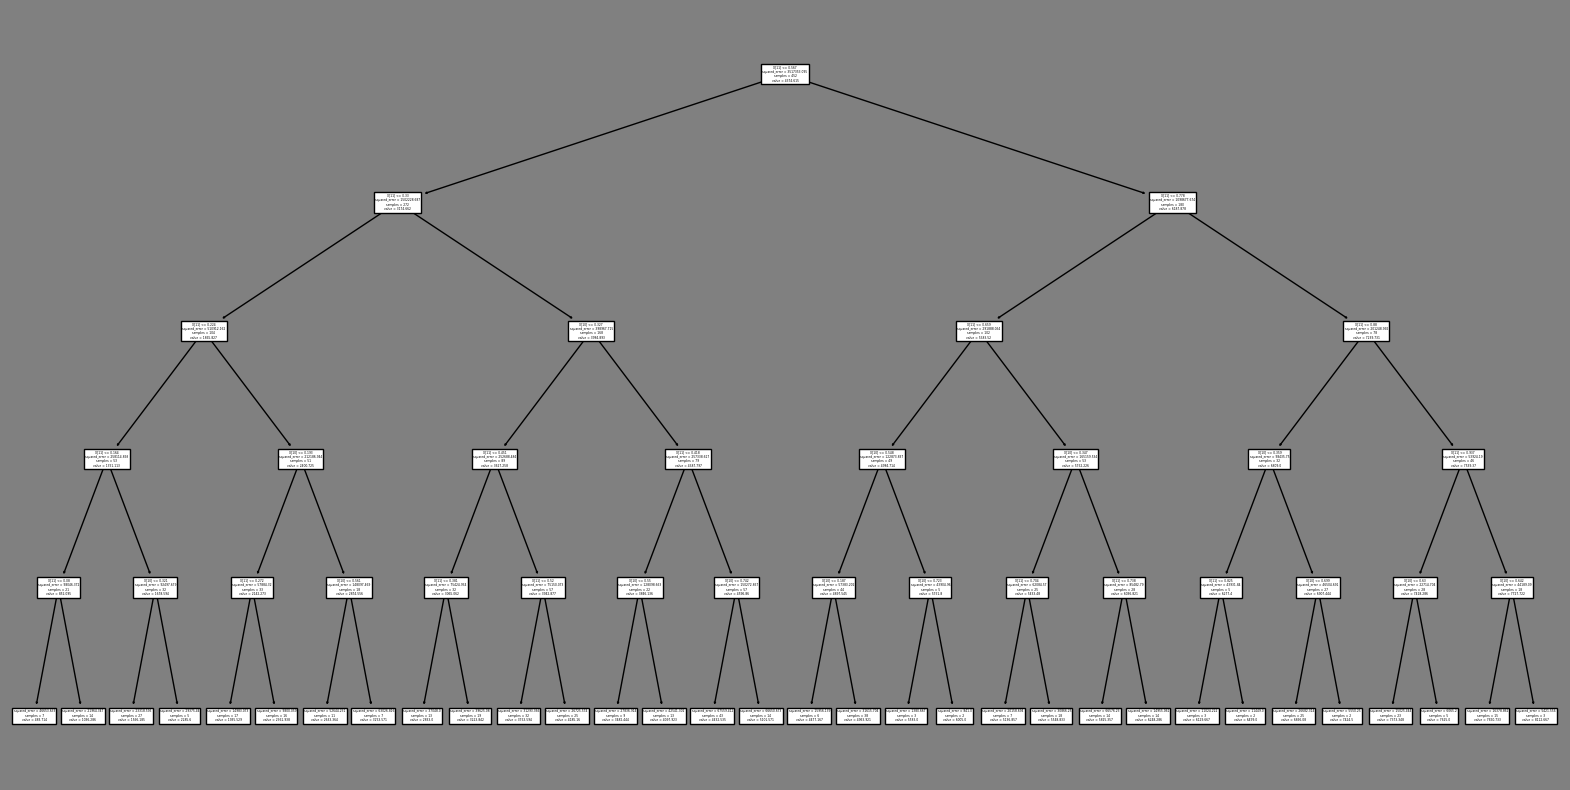

In [38]:
plt.figure(figsize=(20,10),facecolor='grey')
tree.plot_tree(griddtmodel)
plt.show()

In [39]:
rfmodel=RandomForestRegressor(max_depth=3,random_state=10,max_features='auto')
rfmodel.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, random_state=10)

In [40]:
rfy_pred=rfmodel.predict(x_test)

In [41]:
rfmse=mean_squared_error(y_test,rfy_pred)
print("mean squared error:",rfmse)

mean squared error: 121918.64703740638


In [42]:
rfmae=mean_absolute_error(y_test,rfy_pred)
print("mean absolute error:",rfmae)

mean absolute error: 272.10633817149113


In [43]:
rfr2=r2_score(y_test,rfy_pred)
print("r_squared:",rfr2)

r_squared: 0.9624905715001268


In [44]:
rf_rmse=np.sqrt(rfmse)
print("mape:",rf_rmse)

mape: 349.1685080837136


In [45]:
rf_mape=metrics.mean_absolute_percentage_error(y_test,rfy_pred)
print("mape:",rf_mape)

mape: 0.08009741267627556


In [46]:
RandomForest_Results=pd.DataFrame({'attribute':['Regressor','mse','mae','r_square','rmse','mape'],'value':['RandomForest_Regressor',rfmse,rfmae,rfr2,rf_rmse,rf_mape]})

In [47]:
RandomForest_Results

,attribute,value
0,Regressor,RandomForest_Regressor
1,mse,121918.647037
2,mae,272.106338
3,r_square,0.962491
4,rmse,349.168508
5,mape,0.080097


In [48]:
regr=RandomForestRegressor(random_state=0)
param_distributions={
    'n_estimators':[25,50,75],
    'max_depth':[5,10,20],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features':['auto','sqrt',None]
}

random_search=RandomizedSearchCV(regr,param_distributions,random_state=0,n_jobs=-1,verbose=2)
import time
start=time.time()
random_search.fit(x_train,y_train)

print("time taken to complete:",time.time()-start,"seconds")
print(random_search.best_params_)
print(random_search.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
time taken to complete: 5.952073812484741 seconds
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50, random_state=0)


In [49]:
Random_Rf_model=RandomForestRegressor(max_depth=10,
                                     n_estimators=50,
                                     min_samples_split=5,
                                     min_samples_leaf=2,
                                     random_state=0,
                                     max_features='sqrt')
Random_Rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=50, random_state=0)

In [50]:
Random_Rf_y_pred=Random_Rf_model.predict(x_test)

In [51]:
Random_Rf_mse=mean_squared_error(y_test,Random_Rf_y_pred)
Random_Rf_rmse=np.sqrt(Random_Rf_mse)
Random_Rf_mae=mean_absolute_error(y_test,Random_Rf_y_pred)
Random_Rf_mape=mean_absolute_percentage_error(y_test,Random_Rf_y_pred)
Random_Rf_r_score=r2_score(y_test,Random_Rf_y_pred)

In [52]:
l3=["RandomForest",Random_Rf_r_score, Random_Rf_mse, Random_Rf_mae, Random_Rf_rmse, Random_Rf_mape]
Evaluation.loc[len(Evaluation),:]=l3
Evaluation

,model,R_square,Mean_Squared_Error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,decisionTreeregressor,0.983382,54015.033834,185.948307,232.411346,nan
1,RandomForest,0.971201,93606.282,211.704854,305.951437,0.087965


In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

Base_Regressor=DecisionTreeRegressor(max_depth=5)

Ada_Boost_Regressor=AdaBoostRegressor(base_estimator=Base_Regressor,n_estimators=100)

Ada_Boost_Regressor.fit(x_train,y_train)

Ada_Boost_y_pred=Ada_Boost_Regressor.predict(x_test)

Ada_Boost_mse=mean_squared_error(y_test, Ada_Boost_y_pred)

Ada_Boost_rmse=np.sqrt(Ada_Boost_mse)

Ada_Boost_mae=mean_absolute_error(y_test,Ada_Boost_y_pred)

Ada_Boost_mape=mean_absolute_percentage_error(y_test, Ada_Boost_y_pred)

Ada_Boost_r2_score=r2_score(y_test,Ada_Boost_y_pred)

Ada_Boost_Result=pd.DataFrame({"Attribute":["Ada_Boost_mse","Ada_Boost_rmse","Ada_Boost_mae","Ada_Boost_mape","Ada_Boost_r2_score"],
                               "values":[Ada_Boost_mse,Ada_Boost_rmse,Ada_Boost_mae,Ada_Boost_mape,Ada_Boost_r2_score,]})

Ada_Boost_Result

,Attribute,values
0,Ada_Boost_mse,16295.261134
1,Ada_Boost_rmse,127.652893
2,Ada_Boost_mae,97.831571
3,Ada_Boost_mape,0.030147
4,Ada_Boost_r2_score,0.994987


In [54]:
Ada_reg=AdaBoostRegressor()
param_dist={
    'n_estimators':[25,50,75,100],
    'learning_rate':[0.25,0.45,0.68,0.85]
}

Ada_random_search=RandomizedSearchCV(Ada_reg,param_distributions=param_dist, cv=5, n_iter=10, scoring="neg_mean_squared_error",n_jobs=-1,verbose=1)

Ada_random_search.fit(x_train,y_train)

print("best parameters found: ",Ada_random_search.best_params_)
print("best score: ",Ada_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best parameters found:  {'n_estimators': 100, 'learning_rate': 0.68}
best score:  -68005.65109658381


In [55]:
Base_Regressor=DecisionTreeRegressor(max_depth=5)

Random_Ada_Boost_Regressor=AdaBoostRegressor(base_estimator=Base_Regressor,n_estimators=75,learning_rate=0.68)

Random_Ada_Boost_Regressor.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.68, n_estimators=75)

In [56]:
Random_Ada_Boost_y_pred=Random_Ada_Boost_Regressor.predict(x_test)

In [57]:
Random_Ada_Boost_mse=mean_squared_error(y_test,Random_Ada_Boost_y_pred)
Random_Ada_Boost_rmse=np.sqrt(Random_Ada_Boost_mse)
Random_Ada_Boost_mae=mean_absolute_error(y_test,Random_Ada_Boost_y_pred)
Random_Ada_Boost_mape=mean_absolute_percentage_error(y_test,Random_Ada_Boost_y_pred)
Random_Ada_Boost_r2_score=r2_score(y_test,Random_Ada_Boost_y_pred)

In [58]:
l4=["Ada_Boosting",Random_Ada_Boost_r2_score, Random_Ada_Boost_mse, Random_Ada_Boost_mae, Random_Ada_Boost_rmse,Random_Ada_Boost_mape]
Evaluation.loc[len (Evaluation), :]=l4
Evaluation


,model,R_square,Mean_Squared_Error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,decisionTreeregressor,0.983382,54015.033834,185.948307,232.411346,nan
1,RandomForest,0.971201,93606.282,211.704854,305.951437,0.087965
2,Ada_Boosting,0.994775,16982.344908,98.754391,130.316326,0.030557


In [59]:
Gradient_Boost_model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

Gradient_Boost_model.fit(x_train,y_train)

Gradient_Boost_y_pred=Gradient_Boost_model.predict(x_test)

Gradient_Boost_mse=mean_squared_error(y_test,Gradient_Boost_y_pred)

Gradient_Boost_rmse=np.sqrt(Gradient_Boost_mse)

Gradient_Boost_mae=mean_absolute_error(y_test,Gradient_Boost_y_pred)

Gradient_Boost_mape=mean_absolute_percentage_error(y_test,Gradient_Boost_y_pred)

Gradient_Boost_r2_score=r2_score(y_test,Gradient_Boost_y_pred)



Gradient_Boost_Result=pd.DataFrame({"Attribute":["Gradient_Boost_mse","Gradient_Boost_rmse","Gradient_Boost_mae","Gradient_Boost_mape","Gradient_Boost_r2_score"]
                                   ,"values":[Gradient_Boost_mse,Gradient_Boost_rmse,Gradient_Boost_mae,Gradient_Boost_mape,Gradient_Boost_r2_score]})

Gradient_Boost_Result



,Attribute,values
0,Gradient_Boost_mse,7193.534760
1,Gradient_Boost_rmse,84.814708
2,Gradient_Boost_mae,66.145669
3,Gradient_Boost_mape,0.019298
4,Gradient_Boost_r2_score,0.997787


In [60]:
Random_gbr=GradientBoostingRegressor()

param_dist={
    
    "learning_rate":[0.01,0.05,0.1,0.2],
    "n_estimators":[50,75,100],
    "max_depth":[2,3,4,5,6],
    "min_samples_split":[2,4,6,8,10]
    
}

rscv=RandomizedSearchCV(Random_gbr,param_distributions=param_dist,n_iter=10,cv=5,random_state=0,n_jobs=-1,verbose=1)

rscv.fit(x_train,y_train)

print("best hyperparameters:",rscv.best_params_)
print("best score:",rscv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best hyperparameters: {'n_estimators': 75, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.1}
best score: 0.9970768236256315


In [61]:
Random_Gradient_Boost_model=GradientBoostingRegressor(n_estimators=100,min_samples_split=8,learning_rate=0.1,max_depth=6)

Random_Gradient_Boost_model.fit(x_train,y_train)

Random_Gradient_Boost_y_pred=Gradient_Boost_model.predict(x_test)

In [62]:
Random_Gradient_Boost_mse=mean_squared_error(y_test,Random_Gradient_Boost_y_pred)
Random_Gradient_Boost_rmse=np.sqrt(Random_Gradient_Boost_mse)
Random_Gradient_Boost_mae=mean_absolute_error(y_test,Random_Gradient_Boost_y_pred)
Random_Gradient_Boost_mape=mean_absolute_percentage_error(y_test, Random_Gradient_Boost_y_pred)
Random_Gradient_Boost_r2_score=r2_score(y_test,Random_Gradient_Boost_y_pred)

In [63]:
l5=["Gradient_Boosting",Random_Gradient_Boost_r2_score, Random_Gradient_Boost_mse,Random_Gradient_Boost_mae,Random_Gradient_Boost_rmse,Random_Gradient_Boost_mape]
Evaluation.loc[len (Evaluation), :]=l5
Evaluation

,model,R_square,Mean_Squared_Error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,decisionTreeregressor,0.983382,54015.033834,185.948307,232.411346,nan
1,RandomForest,0.971201,93606.282,211.704854,305.951437,0.087965
2,Ada_Boosting,0.994775,16982.344908,98.754391,130.316326,0.030557
3,Gradient_Boosting,0.997787,7193.53476,66.145669,84.814708,0.019298


In [64]:
bagg_reg=DecisionTreeRegressor(random_state=10)
bagging=BaggingRegressor(base_estimator=bagg_reg,n_estimators=25,random_state=10)
bagging.fit(x_train,y_train)

bagg_reg_y_pred=bagging.predict(x_test)

bagging_reg_mse=mean_squared_error(y_test, bagg_reg_y_pred)

bagging_reg_rmse=np.sqrt(bagging_reg_mse)

bagging_reg_mae=mean_absolute_error(y_test,bagg_reg_y_pred)

bagging_reg_mape=mean_absolute_percentage_error(y_test,bagg_reg_y_pred)

bagging_reg_score=r2_score(y_test,bagg_reg_y_pred)

bagging_reg_result=pd.DataFrame({"Attribute":["bagging_reg_mse","bagging_reg_rmse","bagging_reg_mae","bagging_reg_mape","bagging_reg_score"]
                                 ,"values":[bagging_reg_mse,bagging_reg_rmse,bagging_reg_mae,bagging_reg_mape,bagging_reg_score]})

bagging_reg_result
                                    

,Attribute,values
0,bagging_reg_mse,11472.724201
1,bagging_reg_rmse,107.110803
2,bagging_reg_mae,77.144615
3,bagging_reg_mape,0.023442
4,bagging_reg_score,0.996470


In [65]:
base_regressor=DecisionTreeRegressor()
bagging_regressor=BaggingRegressor(base_estimator=base_regressor)

param_distributions={
    'n_estimators':[25,50,75,100],
    'max_samples':uniform(0.1,0.9),
    'max_features':uniform(0.1,0.9),
    'n_jobs':[None,1,2,-1],
    'random_state':[None,randint(0,100)]
}

random_search=RandomizedSearchCV(bagging_regressor,param_distributions,n_iter=10,cv=5,n_jobs=-1,verbose=1)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016AF3434DC0>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016AF3469940>,
                                        'n_estimators': [25, 50, 75, 100],
                                        'n_jobs': [None, 1, 2, -1],
                                        'random_state': [None,
                                                         <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000016AF3480640>]},
                   verbose=1)

In [66]:
Random_Bagging=BaggingRegressor(base_estimator=bagg_reg,
                               n_estimators=75,
                               random_state=None,
                               max_features=0.9,
                               max_samples=0.6,
                               n_jobs=-1
                               )
Random_Bagging.fit(x_train,y_train)
Random_Bagg_reg_y_pred=bagging.predict(x_test)

In [67]:
Random_Bagging_reg_mse=mean_squared_error(y_test,Random_Bagg_reg_y_pred)
Random_Bagging_reg_rmse=np.sqrt(Random_Bagging_reg_mse)
Random_Bagging_reg_mae=mean_absolute_error(y_test,Random_Bagg_reg_y_pred)
Random_Bagging_reg_mape=mean_absolute_percentage_error(y_test,Random_Bagg_reg_y_pred)
Random_Bagging_reg_score=r2_score(y_test,Random_Bagg_reg_y_pred)

In [68]:
l6=["Bagging",Random_Bagging_reg_score,Random_Bagging_reg_mse,Random_Bagging_reg_mae,Random_Bagging_reg_rmse,Random_Bagging_reg_mape]
Evaluation.loc[len (Evaluation),:]=l6
Evaluation

,model,R_square,Mean_Squared_Error,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,decisionTreeregressor,0.983382,54015.033834,185.948307,232.411346,nan
1,RandomForest,0.971201,93606.282,211.704854,305.951437,0.087965
2,Ada_Boosting,0.994775,16982.344908,98.754391,130.316326,0.030557
3,Gradient_Boosting,0.997787,7193.53476,66.145669,84.814708,0.019298
4,Bagging,0.99647,11472.724201,77.144615,107.110803,0.023442


In [69]:
import pickle

In [70]:
filename = 'trained_model.sav'
pickle.dump(Random_Rf_model, open(filename, 'wb'))

In [71]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [72]:
input_data = (0.22,0.576,0.567,0.444,0.768,0.892,0.654,0.4356,0.768,0.892,0.654,0.4356)

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1,-1)

In [73]:
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[3848.88664872]


In [1]:
pip install streamlit

     ---------------------------------------- 8.9/8.9 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 164.8/164.8 kB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 184.3/184.3 kB ? eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 13.9 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 11.5 MB/s eta 0:00:00
     ------------------------------------- 813.6/813.6 kB 17.1 MB/s eta 0:00:00
     ---------------------------------------- 238.7/238.7 kB ? eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 18.0 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 341.8/341.8 kB ? eta 0:00:00
  Created wheel for validators: file

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
